# Pseudo-Random Number Generators in Python

Python has a built-in module called random that can be used to make random numbers.


Later on, we will introduce other libraries that contain generators.

The documentation is easily found with Google. Here are some links:

<a href="https://docs.python.org/3/library/random.html">random</a> (python.org)
<a href="https://www.w3schools.com/python/module_random.asp">Python Random Module</a> (W3School)

## Uniform distributions

Let's start using the random module, which contains an algorithm for generating uniform random numbers between 0 and 1.


In [1]:
import random
print(help(random.random))

Help on built-in function random:

random() method of random.Random instance
    random() -> x in the interval [0, 1).

None


In [7]:
random.seed(12345)

note that if we use the same *seed* the sequence is reproducible-

if we do not inizialize the *seed*, it is inizializd according to the system date

In [8]:
random.random()

0.41661987254534116

In [9]:
for i in range(10):
    print(random.random())

0.010169169457068361
0.8252065092537432
0.2986398551995928
0.3684116894884757
0.19366134904507426
0.5660081687288613
0.1616878239293682
0.12426688428353017
0.4329362680099159
0.5620784880758429


In [10]:
for i in range(10):
    print(random.random())

0.1743435607237318
0.5532210855693298
0.35490138633659873
0.9580647850995486
0.09129409887673512
0.97863999557041
0.412119392939301
0.5039353681100375
0.14814616893018917
0.718967140300885


In [11]:
random.seed(12345)
for i in range(10):
    print(random.random())

0.41661987254534116
0.010169169457068361
0.8252065092537432
0.2986398551995928
0.3684116894884757
0.19366134904507426
0.5660081687288613
0.1616878239293682
0.12426688428353017
0.4329362680099159


To generate random numbers from a minimum $a$ to a maximum $b$, you can:
- generate a random number with random.random()
- multiply by $b-a$
- add $a$

The result will be in the interval $[a,,b)$.

In [12]:
def rnd_ab(a, b):
    return a+(b-a)*random.random()
for i in range(10):
    print(rnd_ab(-2,2))

0.24831395230337172
-1.3026257571050728
0.21288434227731923
-0.5803944546536051
1.8322591403981945
-1.6348236044930595
1.9145599822816401
-0.351522428242796
0.015741472440149895
-1.4074153242792433


...the same by giving $a$ and $b$ as arguments of the ```uniform``` method:

In [13]:
for i in range(10):
    print(random.uniform(-2,2))

0.8758685612035402
-1.2401144851127186
-0.6337582969057913
-1.9059151274311978
-0.6419289104083172
1.8699298355194856
1.9151938167426272
0.9781201605641385
-1.9861815569796177
1.7609540123909713


## plotting and statistics

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
random.seed(12345)
a=1
b=3
N = 100000
R=[]
for i in range(N):
    R+=[random.uniform(a, b)]

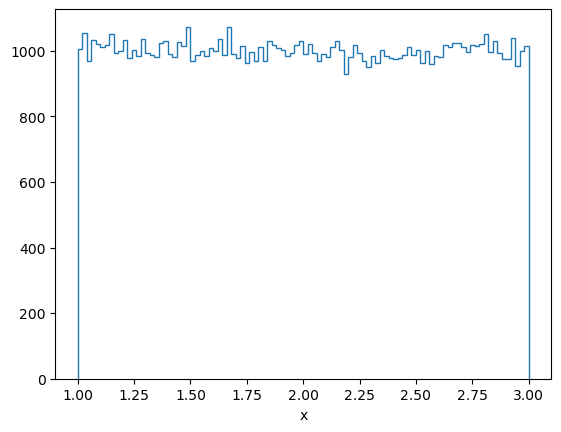

In [18]:
plt.hist(R, bins=100, histtype='step')
plt.xlabel('x')
plt.show()

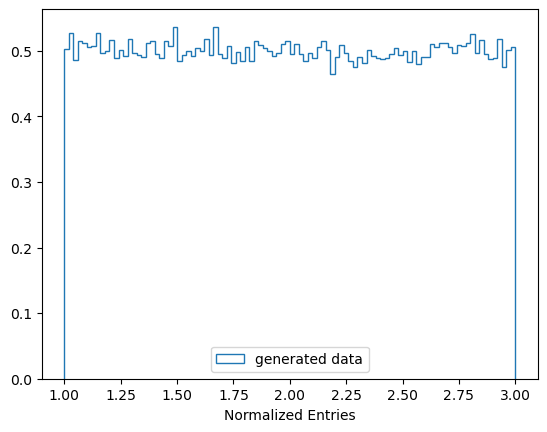

In [23]:
hitst_range=[a, b]
nbins = 100
deltax = (hitst_range[1]-hitst_range[0])/nbins

plt.hist(R, bins=nbins, range=hitst_range, histtype='step', weights=np.ones_like(R)/(N*deltax), label='generated data')

plt.legend()
plt.xlabel('x')
plt.xlabel('Normalized Entries')
#plt.grid()
plt.show()

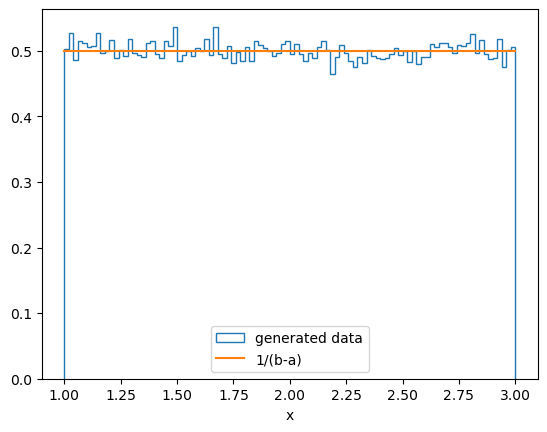

In [24]:
hitst_range=[a, b]
nbins = 100
plt.hist(R, bins=nbins, range=hitst_range, histtype='step', density=True, label='generated data')

x=np.linspace(hitst_range[0], hitst_range[1], nbins)
#x+=(x[1]-x[0])/2
plt.plot(x, 1/(b-a)*np.ones_like(x), label='1/(b-a)')

plt.legend()
plt.xlabel('x')

#plt.grid()
#plt.yscale('log')
plt.show()

In [25]:
np.mean(R)

1.997441357861989

In [26]:
np.std(R)

0.5788213889081013

In [27]:
(b-a)/np.sqrt(12)

0.5773502691896258

# Montecarlo methods for random variable generation

# Cumulative invertion

In [28]:
import math

we can generate random number according to a desired pdf $f(x)$ by inverting its cumulative:

$\displaystyle F(x) = \int_{-\infty}^xf(x^\prime)\,\mathrm{d}x^\prime$

If $r$ in uniform $[0, 1[$ we have to find

$x = F^{-1}(r)$

In [29]:
# exponential distribution

Take the case of the exponential distribution:
    
$f(x) = \lambda e^{-\lambda x}$


$F(x) = 1 -e^{-\lambda x}$


$\displaystyle x= -\frac{1}{\lambda}\log(1-r)$



In [30]:
def rnd_exp(lambd):
    return -math.log(1-random.random())/lambd

In [31]:
N = 100000
lambd = 2
R = [rnd_exp(lambd) for i in range(N)]

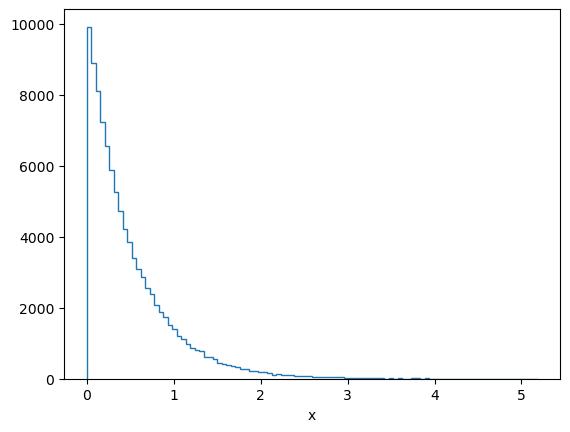

In [33]:
plt.hist(R, bins=100, histtype='step')
plt.xlabel('x')
plt.show()

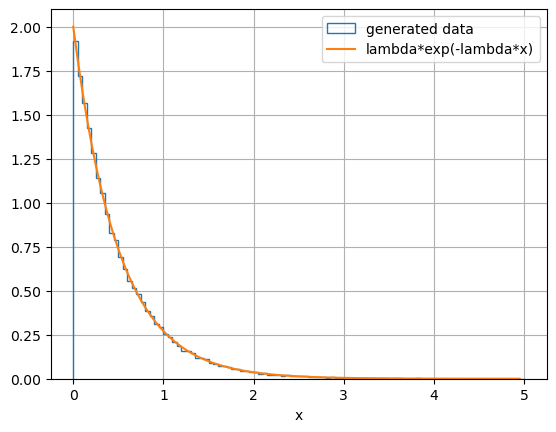

In [34]:
hitst_range=[0, 5]
nbins = 100
plt.hist(R, bins=nbins, range=hitst_range, histtype='step', density=True, label='generated data')

x=np.linspace(hitst_range[0], hitst_range[1], nbins, endpoint=False)
plt.plot(x, lambd*np.exp(-lambd*x), label='lambda*exp(-lambda*x)')

plt.legend()
plt.xlabel('x')
plt.grid()
#plt.yscale('log')
plt.show()

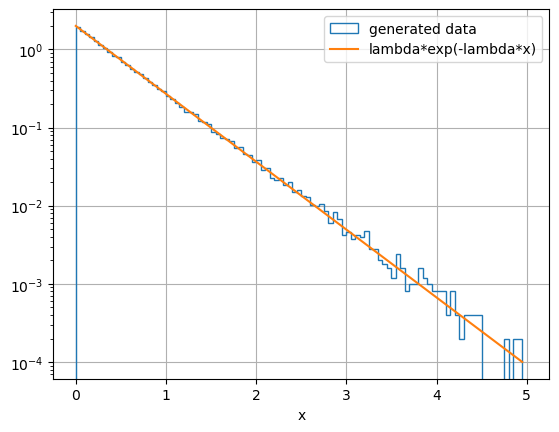

In [35]:
hitst_range=[0, 5]
nbins = 100
plt.hist(R, bins=nbins, range=hitst_range, histtype='step', density=True, label='generated data')

x=np.linspace(hitst_range[0], hitst_range[1], nbins, endpoint=False)
plt.plot(x, lambd*np.exp(-lambd*x), label='lambda*exp(-lambda*x)')

plt.legend()
plt.xlabel('x')
plt.grid()
plt.yscale('log')
plt.show()

In [36]:
np.mean(R)

0.4997749017239794

In [37]:
np.std(R)

0.5013511089197987

# *hit or miss*

steps:
- we generate random number in two dimensions;
- we do accept only points under the curve we desire.

Do not require cumulative invertion but it is less efficient.

Let's do it with the function:

$f(x)=x\,e^{-x}$

In [38]:
def f_mc(x):
    return x*np.exp(-x)

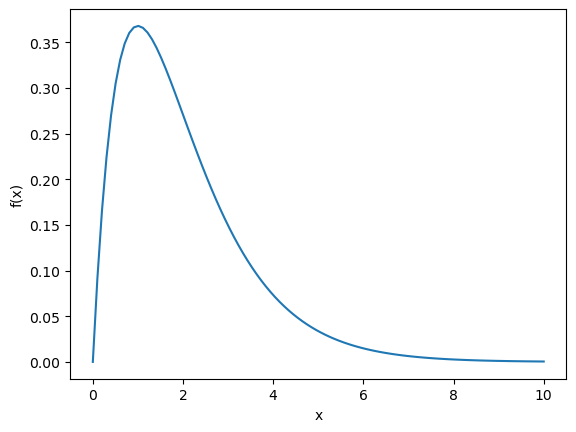

In [40]:
xmin, xmax = 0, 10
x=np.linspace(xmin, xmax, 100)
plt.plot(x,f_mc(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [41]:
ymax = 0.4
step=0.01
npts=20000

In [43]:
xs=np.array([random.random()*(xmax-xmin)+xmin for i in range(npts)])
ys=np.array([random.random()*ymax for i in range(npts)])

In [45]:
hits=(ys<f_mc(xs))

In [46]:
cols=['red']*npts
for i in range(npts):
    if hits[i]: cols[i]='green'

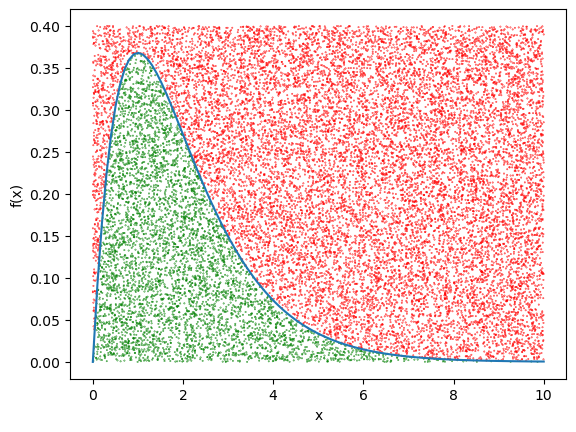

In [48]:
#plt.figure(figsize=(12,12))
x=np.linspace(xmin, xmax, 100)
plt.plot(x,f_mc(x))
plt.scatter(xs,ys,c=cols,s=.1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [49]:
n_hit = len(hits[hits==True])
f_hit = n_hit/npts
print("n. hit:", n_hit)
print("eff:", f_hit)

n. hit: 5021
eff: 0.25105


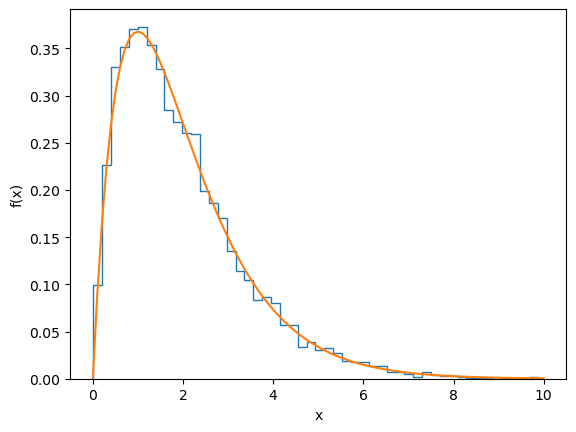

In [51]:
#plt.figure(figsize=(12,12))
plt.hist(xs[hits==True],histtype='step',density=True,bins=50)
plt.plot(x,f_mc(x),)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()